In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Reading the retail data 

retaildata = pd.read_csv(r"D:\00 Datasets\Retail\Retail_EDA\OnlineRetailV_1.0.csv", encoding="ISO-8859-1", header=0)
retaildata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/01 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010/12/01 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/01 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/01 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/01 08:26,3.39,17850.0,United Kingdom


In [3]:
# Shape of retail data

retaildata.shape

(541909, 8)

In [11]:
# Display the retail dataset information

retaildata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406830 non-null  object 
 1   StockCode    406830 non-null  object 
 2   Description  406830 non-null  object 
 3   Quantity     406830 non-null  int64  
 4   InvoiceDate  406830 non-null  object 
 5   UnitPrice    406830 non-null  float64
 6   CustomerID   406830 non-null  object 
 7   Country      406830 non-null  object 
 8   TotalPrice   406830 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 31.0+ MB


In [4]:
# Data Cleansing

# Calculating the Missing Values % contribution in retail data

retail_null = round(100*(retaildata.isnull().sum())/len(retaildata), 2)
retail_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [5]:
# Droping rows having missing values

retaildata = retaildata.dropna()
retaildata.shape

(406830, 8)

In [6]:
# Changing the datatype of Customer Id as per Business understanding

retaildata['CustomerID'] = retaildata['CustomerID'].astype(str)

In [7]:
# Data Preparation

# We are going to analysis the Customers based on below 3 factors:
# 01 - R (Recency): Number of days since last purchase
# 02 - F (Frequency): Number of tracsactions
# 03 - M (Monetary): Total amount of transactions (revenue contributed)

# New variable : TotalPrice

retaildata['TotalPrice'] = retaildata['Quantity'] * retaildata['UnitPrice']
retail_m = retaildata.groupby('CustomerID')['TotalPrice'].sum()
retail_m = retail_m.reset_index()
retail_m.head()

,CustomerID,TotalPrice
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [8]:
retail_m.shape

(4373, 2)

In [9]:
retail_m.head()

,CustomerID,TotalPrice
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [12]:
# New variable : Frequency

retail_f = retaildata.groupby('CustomerID')['InvoiceDate'].count()
retail_f = retail_f.reset_index()
retail_f.columns = ['CustomerID', 'Frequency']
retail_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [13]:
# Merging the two retail_m and retail_f dataframes

retail = pd.merge(retail_m, retail_f, on='CustomerID', how='inner')
retail.head() # Merging the two retail_m and retail_f dataframes

,CustomerID,TotalPrice,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [14]:
# New variable : Recency
# Convert to datetime to proper datatype

retaildata['InvoiceDate'] = pd.to_datetime(retaildata['InvoiceDate'],format='%Y-%m-%d %H:%M')
retaildata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
# Compute the maximum date to know the last transaction date

max_date = max(retaildata['InvoiceDate'].dt.date)
max_date

datetime.date(2011, 12, 9)

In [16]:
# Create new variable as 'Date'

retaildata['Date'] = retaildata['InvoiceDate'].dt.date
retaildata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [17]:
# Compute the difference between max date and transaction date

retaildata['Diff'] = max_date - retaildata['Date']
retaildata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,373 days
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,373 days
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,373 days
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,373 days
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,373 days


In [18]:
# Compute last transaction date to get the recency of customers

retail_p = retaildata.groupby('CustomerID')['Diff'].min()
retail_p = retail_p.reset_index()
retail_p.head()

,CustomerID,Diff
0,12346.0,325 days
1,12347.0,2 days
2,12348.0,75 days
3,12349.0,18 days
4,12350.0,310 days


In [19]:
# Extract number of days only

retail_p['Diff'] = retail_p['Diff'].dt.days
retail_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [20]:
# Merge tha dataframes to get the final retail dataframe

retailF = pd.merge(retail, retail_p, on='CustomerID', how='inner')
retailF.columns = ['CustomerID', 'TotalPrice', 'Frequency', 'Recency']
retailF.head()

,CustomerID,TotalPrice,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,2
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,310


Text(0.5, 0, 'Attributes')

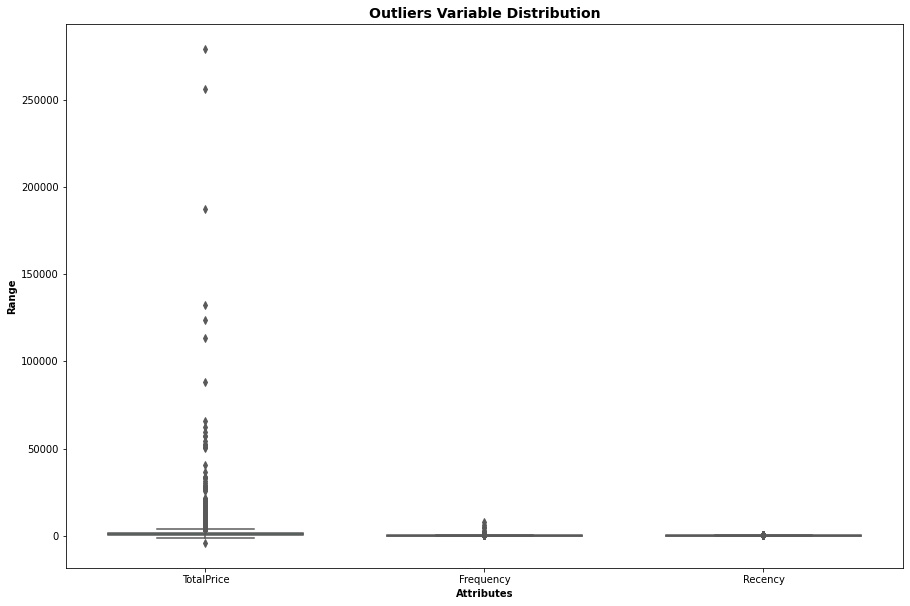

In [21]:
# Outlier Analysis of TotalPrice, Frequency and Recency

import seaborn as sns

variables = ['TotalPrice','Frequency','Recency']
plt.rcParams['figure.figsize'] = [15,10]
sns.boxplot(data = retailF[variables], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [22]:
# Removing (statistical) outliers for TotalPrice

Q1 = retailF.TotalPrice.quantile(0.05)
Q3 = retailF.TotalPrice.quantile(0.95)
IQR = Q3 - Q1
retailF = retailF[(retailF.TotalPrice >= Q1 - 1.5*IQR) & (retailF.TotalPrice <= Q3 + 1.5*IQR)]

In [23]:
# Removing (statistical) outliers for Recency

Q1 = retailF.Recency.quantile(0.05)
Q3 = retailF.Recency.quantile(0.95)
IQR = Q3 - Q1
retailF = retailF[(retailF.Recency >= Q1 - 1.5*IQR) & (retailF.Recency <= Q3 + 1.5*IQR)]

In [24]:
# Removing (statistical) outliers for Frequency

Q1 = retailF.Frequency.quantile(0.05)
Q3 = retailF.Frequency.quantile(0.95)
IQR = Q3 - Q1
retailF = retailF[(retailF.Frequency >= Q1 - 1.5*IQR) & (retailF.Frequency <= Q3 + 1.5*IQR)]

In [25]:
# Rescaling the variables - It is extremely important to rescale the variables so that they have a comparable scale.
# There are two common ways of rescaling: 01- Min-Max scaling 02- Standardisation (mean-0, sigma-1)

# Rescaling the attributes

retailF1 = retailF[['TotalPrice', 'Frequency', 'Recency']]
#retailF1 = retailF.copy()

# Instantiate 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit_transform
retailF1_scaled = scaler.fit_transform(retailF1)
retailF1_scaled.shape

(4294, 3)

In [26]:
# Convert the dataframe format

retailF1_scaled = pd.DataFrame(retailF1_scaled)
retailF1_scaled.head()

,0,1,2
0,-0.723613,-0.752747,2.293756
1,1.731882,1.042695,-0.901756
2,0.300311,-0.463481,-0.179550
3,0.277699,-0.044545,-0.743464
4,-0.533099,-0.603126,2.145357


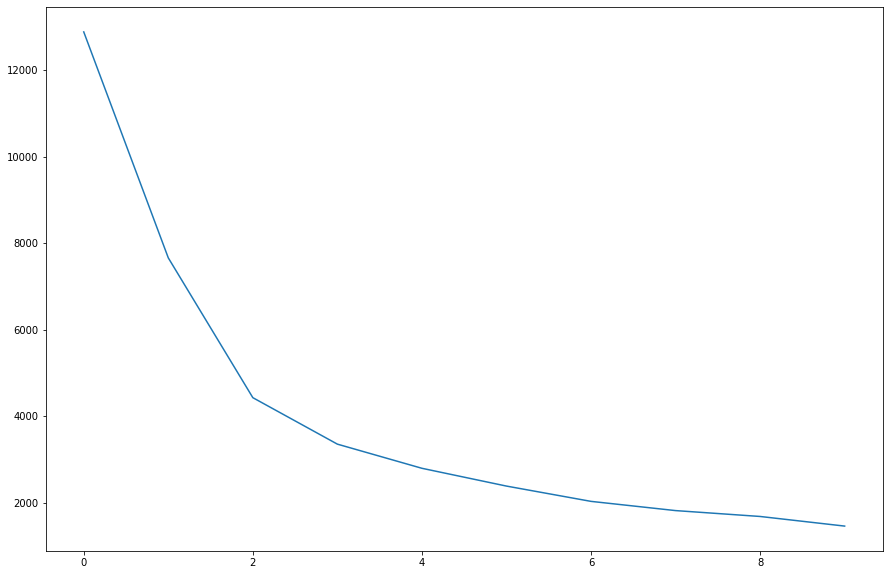

In [27]:
# Finding the Optimal Number of Clusters by using Elbow Curve method

from sklearn.cluster import KMeans

# Elbow-curve/SSD

SSE = []
for cluster in range(1,11):
    modelKM = KMeans(n_clusters = cluster, init='k-means++', random_state=42)
    modelKM.fit(retailF1_scaled)
    SSE.append(modelKM.inertia_)


# plot the SSDs for each n_clusters

plt.plot(SSE)

In [28]:
# Building the Model - K-Means Clustering

from sklearn.cluster import KMeans

# k-means with some arbitrary k

modelKM = KMeans(n_jobs = -1, n_clusters = 3, max_iter=50, init='k-means++')

# Fit the model

modelKM.fit(retailF1_scaled)

KMeans(max_iter=50, n_clusters=3, n_jobs=-1)

In [29]:
# Assign the cluster id to dataset

retailF['Cluster_Id'] = modelKM.labels_
retailF.head()

,CustomerID,TotalPrice,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,2,1
2,12348.0,1797.24,31,75,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,310,2


<AxesSubplot:xlabel='Cluster_Id', ylabel='TotalPrice'>

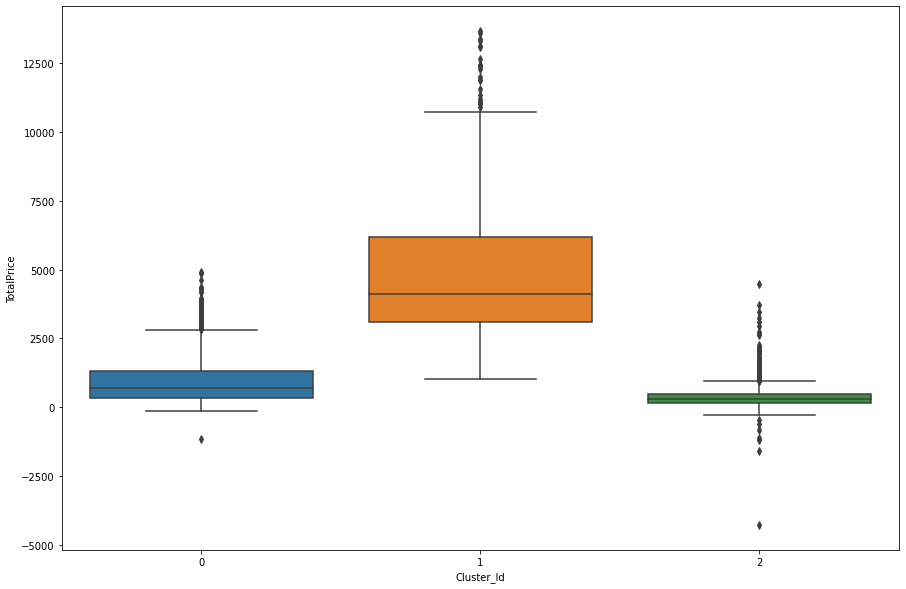

In [30]:
# Box plot to visualize Cluster Id vs TotalPrice

sns.boxplot(x='Cluster_Id', y='TotalPrice', data=retailF)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

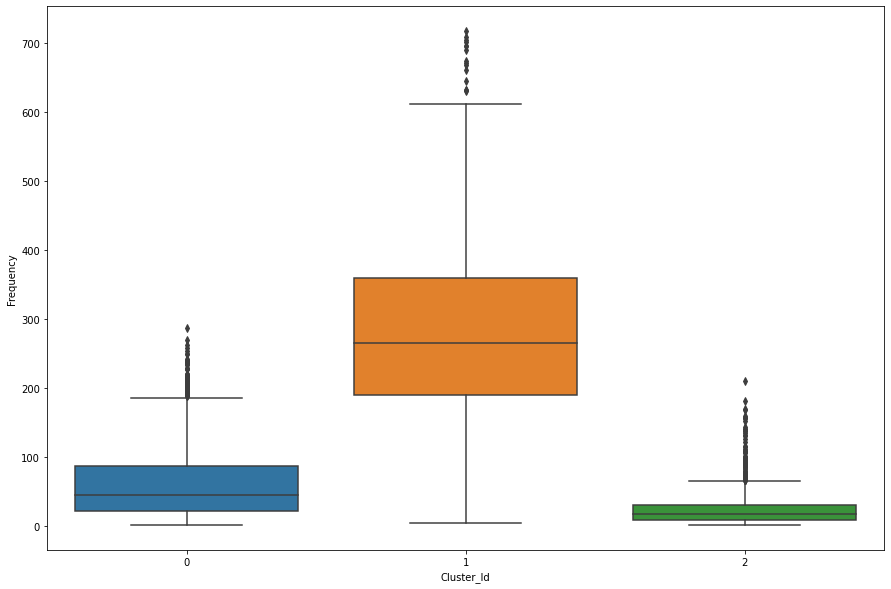

In [31]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=retailF)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

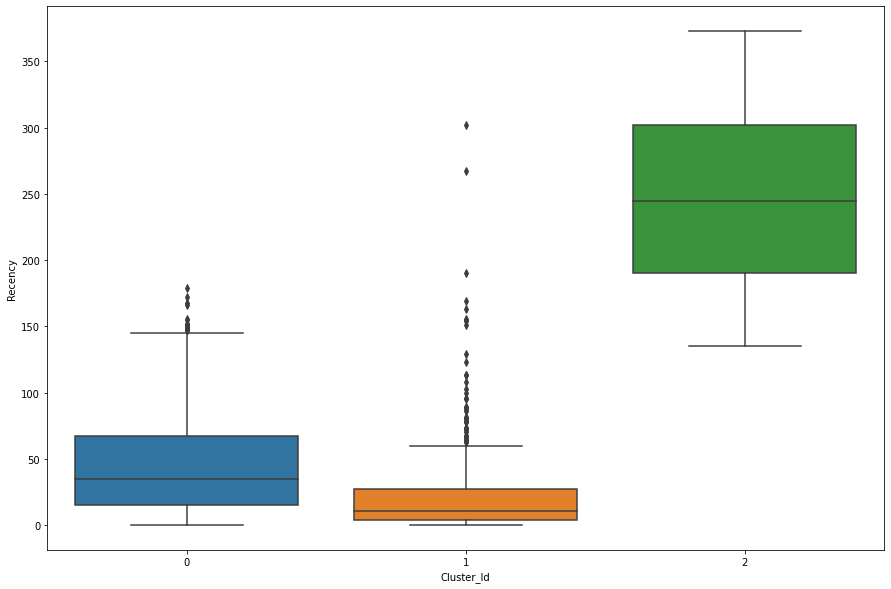

In [32]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=retailF)

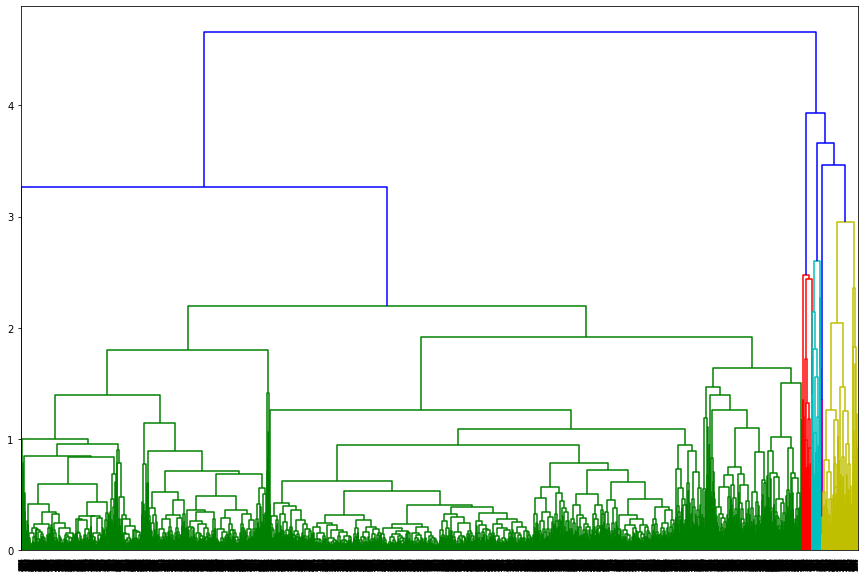

In [33]:
# Average linkage

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

mergings = linkage(retailF1_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [34]:
# 3 clusters

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
# Assign cluster labels

retailF['Cluster_Labels'] = cluster_labels
retailF.head()

,CustomerID,TotalPrice,Frequency,Recency,Cluster_Id,Cluster_Labels
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,2,1,0
2,12348.0,1797.24,31,75,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,310,2,0


<AxesSubplot:xlabel='Cluster_Labels', ylabel='TotalPrice'>

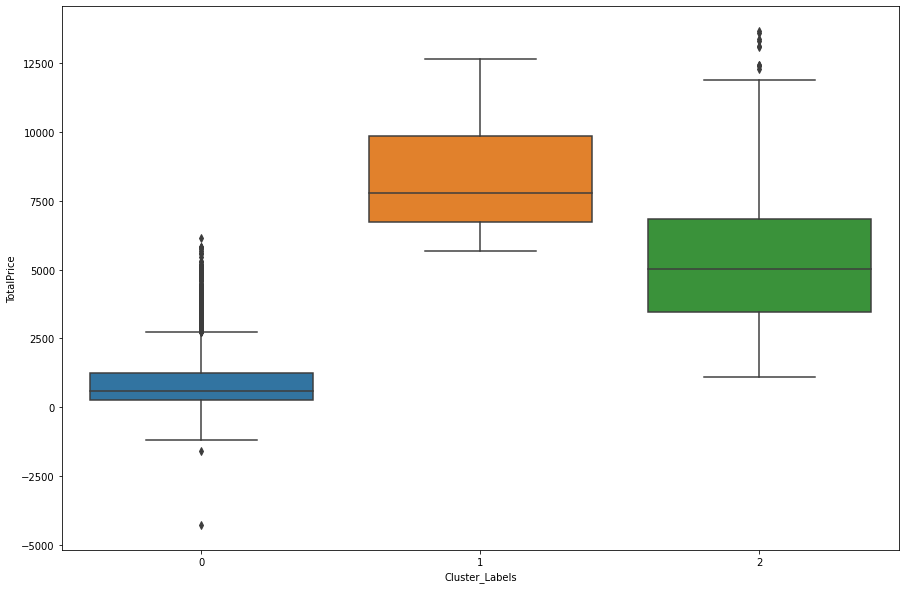

In [36]:
# Plot Cluster Labels vs totalPrice

sns.boxplot(x='Cluster_Labels', y='TotalPrice', data=retailF)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Frequency'>

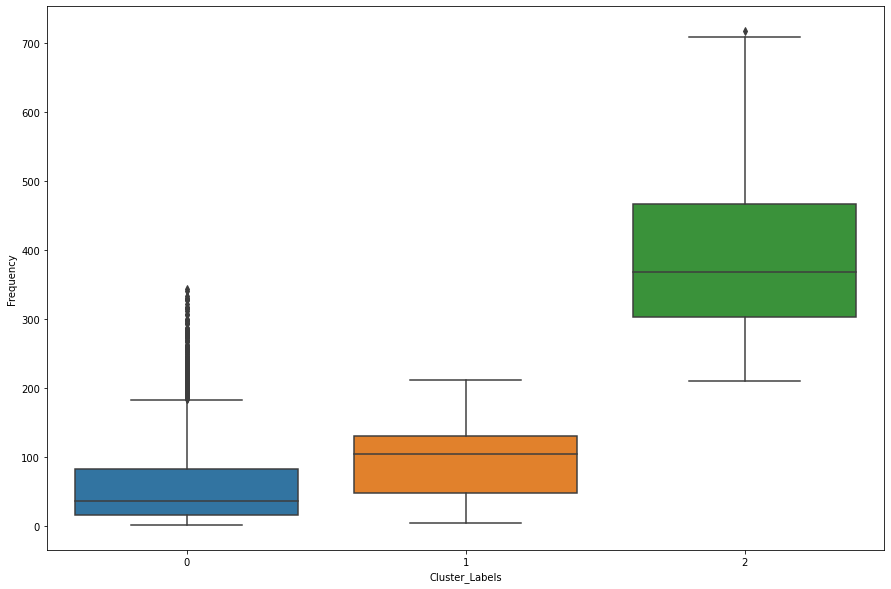

In [37]:
# Plot Cluster Labels vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=retailF)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Recency'>

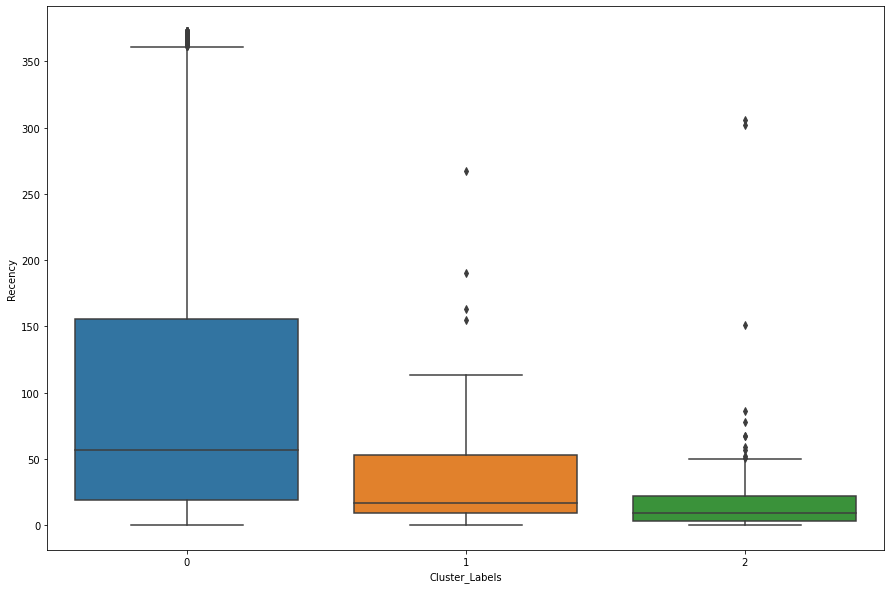

In [38]:
# Plot Cluster Labels vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=retailF)

In [39]:
# Final Analysis
#Inference: K-Means Clustering with 3 Cluster Ids

# 01 - Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.
# 02 - Customers with Cluster Id 1 are frequent buyers.
# 03 - Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.

# Hierarchical Clustering with 3 Cluster Labels

# 01 - Customers with Cluster_Labels 2 are the customers with high amount of transactions as compared to other customers.
# 02 - Customers with Cluster_Labels 2 are frequent buyers.
# 03 - Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.